# Agregación de datos por columna

In [2]:
import numpy as np
import pandas as pd

In [3]:
gender = ["Male", "Female"]
economic_class = ["Poor", "Middle Class", "Rich"]

In [4]:
n = 500

gender_data = []
economic_class_data = []

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    economic_class_data.append(np.random.choice(economic_class))

In [5]:
gender_data[1:10]

['Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male']

In [6]:
economic_class_data[1:10]

['Poor', 'Rich', 'Rich', 'Rich', 'Rich', 'Rich', 'Rich', 'Rich', 'Rich']

In [7]:
# z -> N(0,1)
# N(media, desviación estándar) -> media + desviación * z

height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.rand(n)
age = 30 + 12 * np.random.rand(n)
income = 18000 + 3500 * np.random.rand(n)

In [8]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : economic_class_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [9]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,206.464341,84.942172,32.157006,19014.999889
1,Male,Poor,140.480127,75.141687,31.633437,19133.142430
2,Male,Rich,196.209842,83.388277,38.410168,20176.934427
3,Male,Rich,119.596712,89.878594,33.326714,20786.891651
4,Female,Rich,104.896178,68.071419,39.084595,19711.539358


# Agrupación de datos

In [10]:
grouped_gender = data.groupby("Gender")

In [11]:
grouped_gender.groups

{'Female': Int64Index([  0,   4,   6,   7,  10,  11,  20,  21,  22,  23,
             ...
             483, 488, 489, 490, 491, 493, 494, 497, 498, 499],
            dtype='int64', length=260),
 'Male': Int64Index([  1,   2,   3,   5,   8,   9,  12,  13,  14,  15,
             ...
             479, 481, 482, 484, 485, 486, 487, 492, 495, 496],
            dtype='int64', length=240)}

In [12]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
0    Female            Poor  206.464341  84.942172  32.157006  19014.999889
4    Female            Rich  104.896178  68.071419  39.084595  19711.539358
6    Female            Rich  139.679381  89.506492  40.237463  19325.040212
7    Female            Rich  165.979736  83.297618  38.167286  18761.226026
10   Female            Poor  174.137594  74.500251  35.287238  18867.819307
..      ...             ...         ...        ...        ...           ...
493  Female            Poor  148.831301  84.563092  39.256169  21340.080219
494  Female    Middle Class  159.791657  73.790841  36.614396  20999.280273
497  Female    Middle Class  185.869659  76.544721  36.886628  20649.514271
498  Female    Middle Class  185.717853  82.331324  31.314299  19895.155000
499  Female            Rich  180.080540  80.659519  38.511796  20750.963428

[260 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight   

In [15]:
grouped_gender.get_group("Male")

,Gender,Economic Status,Height,Weight,Age,Income
1,Male,Poor,140.480127,75.141687,31.633437,19133.142430
2,Male,Rich,196.209842,83.388277,38.410168,20176.934427
3,Male,Rich,119.596712,89.878594,33.326714,20786.891651
5,Male,Rich,128.918681,79.175352,36.500068,19452.571365
8,Male,Rich,160.363677,78.109922,37.135787,18628.203731
...,...,...,...,...,...,...
486,Male,Poor,145.386832,73.674596,38.348529,20820.465134
487,Male,Poor,160.419600,77.575095,40.444073,18384.050800
492,Male,Middle Class,172.818705,68.529194,32.278102,19004.749822
495,Male,Middle Class,140.990622,79.704743,34.717549,20931.094885


In [16]:
double_group = data.groupby(["Gender", "Economic Status"])

In [17]:
len(double_group)

6

In [18]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
20   Female    Middle Class  162.443731  74.497720  37.526394  21081.304186
21   Female    Middle Class  153.163782  82.771744  41.327345  20132.101739
22   Female    Middle Class  178.930875  68.414710  31.046732  21081.517301
28   Female    Middle Class  104.593755  88.180357  33.390125  18221.264701
48   Female    Middle Class  191.508685  71.890028  39.130912  19427.754246
..      ...             ...         ...        ...        ...           ...
480  Female    Middle Class  174.587121  67.415993  30.397339  21046.017889
490  Female    Middle Class  146.690011  79.508356  41.053557  21319.498278
494  Female    Middle Class  159.791657  73.790841  36.614396  20999.280273
497  Female    Middle Class  185.869659  76.544721  36.886628  20649.514271
498  Female    Middle Class  185.717853  82.331324  31.314299  19895.155000

[80 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

# Operaciones sobre datos agrupados

In [20]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     12865.909368  6132.733388  2943.411943  1.573430e+06
       Poor             15805.952914  7586.057671  3538.067577  1.946912e+06
       Rich             13151.303555  6315.126603  2984.175623  1.611761e+06
Male   Middle Class     11995.058237  5831.104431  2666.936796  1.474567e+06
       Poor             13030.178371  6161.642436  2906.239380  1.577049e+06
       Rich             13399.644736  6600.481426  3016.010340  1.685122e+06

In [22]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.823867  76.659167  36.792649  19667.876087
       Poor             161.285234  77.408752  36.102730  19866.451920
       Rich             160.381751  77.013739  36.392386  19655.616362
Male   Middle Class     159.934110  77.748059  35.559157  19660.896914
       Poor             162.877230  77.020530  36.327992  19713.114776
       Rich             157.642879  77.652723  35.482475  19824.968676

In [23]:
double_group.size()

Gender  Economic Status
Female  Middle Class       80
        Poor               98
        Rich               82
Male    Middle Class       75
        Poor               80
        Rich               85
dtype: int64

In [24]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      80.0  160.823867  30.276481  83.101654  139.023250   
       Poor              98.0  161.285234  32.436672  89.822528  136.641616   
       Rich              82.0  160.381751  29.124804  89.240163  140.799872   
Male   Middle Class      75.0  159.934110  28.974940  97.585589  141.480803   
       Poor              80.0  162.877230  25.907141  87.487156  149.067503   
       Rich              85.0  157.642879  30.147921  86.815285  140.028830   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     160.189500  179.632852  246.320177   80.0  76.659167   
       Poor             164.547605  186.558656  244.059237   98.0  77.408752   
       Rich             160.388559  180.683455  261.713566   82.0  77.013739   
Male   Middle Class     160.848249  177.371035  225.413984   75.0  77.748059   
       Poor             163.355563  177.679616  227.264330   80.0  77.020530   
       Rich             157.850268  177.965551  240.936088   85.0  77.652723   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  39.641317  41.947696   80.0  19667.876087   
       Poor             ...  38.407696  41.928126   98.0  19866.451920   
       Rich             ...  39.075463  41.828638   82.0  19655.616362   
Male   Middle Class     ...  38.549753  41.739500   75.0  19660.896914   
       Poor             ...  39.144730  41.413956   80.0  19713.114776   
       Rich             ...  38.374354  41.920255   85.0  19824.968676   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     1073.384494  18015.732527  18799.206254  19631.407497   
       Poor              946.221298  18030.999990  18957.411480  19970.172309   
       Rich             1012.687848  18001.322779  18784.494065  19491.314834   
Male   Middle Class     1023.137518  18118.418088  18660.419691  19543.381127   
       Poor             1032.895406  18114.945847  18814.829407  19585.020965   
       Rich             1020.466332  18020.596386  18871.571864  19953.752435   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20647.225004  21496.782795  
       Poor             20723.424470  21421.423104  
       Rich             20593.508302  21445.962354  
Male   Middle Class     20598.545675  21447.553416  
       Poor             20615.496130  21498.837454  
       Rich             20600.578344  21457.810966  

[6 rows x 32 columns]

In [25]:
grouped_income = double_group["Income"]

In [27]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      80.0  19667.876087  1073.384494  18015.732527   
       Poor              98.0  19866.451920   946.221298  18030.999990   
       Rich              82.0  19655.616362  1012.687848  18001.322779   
Male   Middle Class      75.0  19660.896914  1023.137518  18118.418088   
       Poor              80.0  19713.114776  1032.895406  18114.945847   
       Rich              85.0  19824.968676  1020.466332  18020.596386   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18799.206254  19631.407497  20647.225004  21496.782795  
       Poor             18957.411480  19970.172309  20723.424470  21421.423104  
       Rich             18784.494065  19491.314834  20593.508302  21445.962354  
Male   Middle Class     18660.419691  19543.381127  20598.545675  21447.553416  
       Poor             18814.829407  19585.020965  20615.496130  21498.837454  
       Rich             18871.571864  19953.752435  20600.578344  21457.810966

In [33]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.573430e+06  36.792649  30.276481
       Poor             1.946912e+06  36.102730  32.436672
       Rich             1.611761e+06  36.392386  29.124804
Male   Middle Class     1.474567e+06  35.559157  28.974940
       Poor             1.577049e+06  36.327992  25.907141
       Rich             1.685122e+06  35.482475  30.147921

In [36]:
double_group.aggregate({
    "Age": np.mean,
    "Height": lambda h: (np.mean(h) / np.std(h))
})

Age    Height
Gender Economic Status                     
Female Middle Class     36.792649  5.345355
       Poor             36.102730  4.997876
       Rich             36.392386  5.540594
Male   Middle Class     35.559157  5.556910
       Poor             36.327992  6.326628
       Rich             35.482475  5.260013

In [37]:
double_group.aggregate([np.sum, np.max, np.std])

Height                              Weight  \
                                 sum        amax        std          sum   
Gender Economic Status                                                     
Female Middle Class     12865.909368  246.320177  30.276481  6132.733388   
       Poor             15805.952914  244.059237  32.436672  7586.057671   
       Rich             13151.303555  261.713566  29.124804  6315.126603   
Male   Middle Class     11995.058237  225.413984  28.974940  5831.104431   
       Poor             13030.178371  227.264330  25.907141  6161.642436   
       Rich             13399.644736  240.936088  30.147921  6600.481426   

                                                     Age                       \
                             amax       std          sum       amax       std   
Gender Economic Status                                                          
Female Middle Class     89.126535  6.637664  2943.411943  41.947696  3.415085   
       Poor             89.095046  6.463665  3538.067577  41.928126  3.383289   
       Rich             89.506492  6.695579  2984.175623  41.828638  3.575138   
Male   Middle Class     89.744578  7.893378  2666.936796  41.739500  3.297542   
       Poor             89.700601  6.940468  2906.239380  41.413956  3.453762   
       Rich             89.878594  7.590491  3016.010340  41.920255  3.411883   

                              Income                             
                                 sum          amax          std  
Gender Economic Status                                           
Female Middle Class     1.573430e+06  21496.782795  1073.384494  
       Poor             1.946912e+06  21421.423104   946.221298  
       Rich             1.611761e+06  21445.962354  1012.687848  
Male   Middle Class     1.474567e+06  21447.553416  1023.137518  
       Poor             1.577049e+06  21498.837454  1032.895406  
       Rich             1.685122e+06  21457.810966  1020.466332

In [38]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height     Weight        Age     Income
                        <lambda>   <lambda>   <lambda>   <lambda>
Gender Economic Status                                           
Female Middle Class     5.345355  11.621985  10.841540  18.438840
       Poor             4.997876  12.037559  10.725761  21.103513
       Rich             5.540594  11.572961  10.241938  19.528797
Male   Middle Class     5.556910   9.916112  10.856153  19.345684
       Poor             6.326628  11.167326  10.584747  19.205709
       Rich             5.260013  10.290978  10.461396  19.542659

# Filtrado de datos

Permite tomar datos agrupados y aplicar filtros sobre estos datos ya agrupados, lo que permite segmentar datasets muy grandes para su posterior manipulación de datos. En este ejemplo, tomaremos los datos agrupados por "Age" y los filtraremos por todos aqueloos que sumen más de 2.400

- Lista los elementos del grupo que cumple con esas características.

In [41]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      32.157006
1      31.633437
2      38.410168
3      33.326714
4      39.084595
         ...    
495    34.717549
496    31.273781
497    36.886628
498    31.314299
499    38.511796
Name: Age, Length: 500, dtype: float64

# Transformación de variables

In [43]:
z_score = lambda x : (x - x.mean()) / x.std()

In [44]:
z_group = double_group.transform(z_score)

In [47]:
import matplotlib.pyplot as plt

(array([38., 49., 43., 43., 54., 66., 73., 55., 60., 19.]),
 array([-1.93697688, -1.55459214, -1.17220741, -0.78982267, -0.40743794,
        -0.0250532 ,  0.35733153,  0.73971627,  1.122101  ,  1.50448574,
         1.88687047]),
 <a list of 10 Patch objects>)

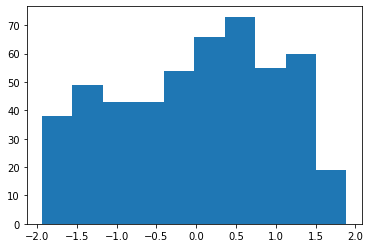

In [48]:
plt.hist(z_group["Age"])

Para reemplazar los NA por el promedio de la su variable, se hace una transformación de la variable de esta manera:
1. Se construye la función que se aplicará durante la transformación.
2. Se aplica la función sobre la transformación en la variable deseada.

*Nota: En este ejemplo no aplica buscar NA ya que el dataset carece de esto. Sin embargo, es importante tener presente este proceso durante las transformaciones de variables.

In [49]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [50]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,206.464341,84.942172,32.157006,19014.999889
1,140.480127,75.141687,31.633437,19133.142430
2,196.209842,83.388277,38.410168,20176.934427
3,119.596712,89.878594,33.326714,20786.891651
4,104.896178,68.071419,39.084595,19711.539358
...,...,...,...,...
495,140.990622,79.704743,34.717549,20931.094885
496,180.149466,68.106791,31.273781,21040.418623
497,185.869659,76.544721,36.886628,20649.514271
498,185.717853,82.331324,31.314299,19895.155000


In [51]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Poor,206.464341,84.942172,32.157006,19014.999889
1,Male,Poor,140.480127,75.141687,31.633437,19133.142430
2,Male,Rich,196.209842,83.388277,38.410168,20176.934427
4,Female,Rich,104.896178,68.071419,39.084595,19711.539358
12,Male,Middle Class,152.110588,65.406753,30.801655,20089.404916
20,Female,Middle Class,162.443731,74.497720,37.526394,21081.304186


In [52]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
485,Male,Rich,207.592765,77.383174,36.768189,20961.383137
487,Male,Poor,160.419600,77.575095,40.444073,18384.050800
493,Female,Poor,148.831301,84.563092,39.256169,21340.080219
496,Male,Middle Class,180.149466,68.106791,31.273781,21040.418623
498,Female,Middle Class,185.717853,82.331324,31.314299,19895.155000
499,Female,Rich,180.080540,80.659519,38.511796,20750.963428


In [53]:
double_group.nth(50)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     136.292596  82.647878  32.868399  18723.195011
       Poor             114.674106  71.639491  37.874961  19956.732831
       Rich             175.447995  75.936755  40.666615  20932.069060
Male   Middle Class     138.746595  87.606423  40.356469  18690.215394
       Poor             129.621622  86.453654  33.163363  18431.708552
       Rich             112.509181  83.595957  35.628566  21275.093899

In [55]:
data_sorted = data.sort_values(["Age", "Income"])

In [56]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
321,Male,Middle Class,169.727820,75.884714,30.006740,21349.161484
238,Female,Poor,165.938920,74.893854,30.014943,18688.536239
198,Female,Rich,168.181281,74.467721,30.019067,20795.629032
431,Female,Poor,174.046603,73.842021,30.036072,20820.738102
254,Female,Poor,143.266333,82.811081,30.044046,19983.611787
290,Male,Poor,149.070197,74.500264,30.057044,20058.275557
230,Female,Rich,124.129648,77.523978,30.065069,20944.083758
297,Male,Rich,174.452417,78.959141,30.078198,19277.215592
174,Male,Middle Class,141.991780,65.023853,30.103438,18641.417957
76,Female,Poor,170.919836,80.068559,30.154377,18030.999990


In [58]:
age_grouped = data_sorted.groupby("Gender")

In [59]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
321,Male,Middle Class,169.72782,75.884714,30.006740,21349.161484
238,Female,Poor,165.93892,74.893854,30.014943,18688.536239


In [61]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
151,Male,Rich,86.815285,72.859325,41.920255,19178.107219
352,Female,Middle Class,109.581460,71.362206,41.947696,18906.039742


# Conjuntos de entrenamiento y testing

In [62]:
import pandas as pd

In [63]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [65]:
len(data)

3333

### Dividir utilizando la distribución normal

1. Crear un vector "a" de la misma longitud del dataset (3.333) pero distribuido de forma normal.
2. Construir condición que filtre todos aquellos valores que estén por debajo de la distribución normal en 0.8 o 0.75 (según sea el caso que necesitemos para el conjunto de entrenamiento)

In [67]:
a = np.random.randn(len(data))

(array([   4.,   24.,  143.,  443.,  783., 1008.,  610.,  241.,   64.,
          13.]),
 array([-3.87930582, -3.14177865, -2.40425148, -1.6667243 , -0.92919713,
        -0.19166996,  0.54585721,  1.28338439,  2.02091156,  2.75843873,
         3.4959659 ]),
 <a list of 10 Patch objects>)

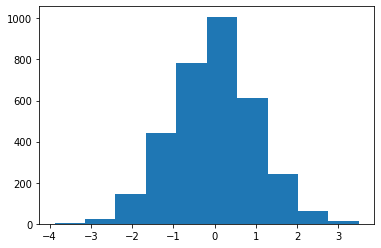

In [71]:
plt.hist(a)

In [73]:
len(a)

3333

In [74]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [84]:
check = (a < 0.8)

In [85]:
check

array([ True,  True,  True, ..., False, False, False])

In [87]:
training = data[check]

In [88]:
testing = data[~check]

In [89]:
len(training)

2672

In [90]:
len(testing)

661

In [93]:
training.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
11,RI,74,415,344-9403,no,no,0,187.7,127,31.91,...,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False.


### Dividir usando la librería sklearn

Técnica de la validación cruzada:
1. Se crean los datasets "data_train" y "data_test" a partir de la función "train_test_split" que toma el dataset "data" y lo divide porcentualmente tomando como valor el tamaño del conjunto de test como 0.2.

*Nota: esta aleatoriedad no se puede reproducir debido a que la distribución de los registros queda en manos del método "train_test_split", por lo que no podemos controlarlo como es el caso de dejar una "semilla aleatoria".

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
data_train, data_test = train_test_split(data, test_size = 0.2)

In [96]:
len(data_train)

2666

In [97]:
len(data_test)

667

### Dividir usando la función Shuffle

In [99]:
import sklearn

In [102]:
sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2954,TX,57,415,403-6225,no,no,0,161.0,113,27.37,...,134,17.68,208.1,81,9.36,8.4,4,2.27,3,False.
1254,MN,62,510,390-9811,no,yes,33,186.4,84,31.69,...,136,17.09,286.7,103,12.90,11.1,3,3.00,2,True.
3005,OH,66,415,408-6305,no,no,0,170.5,103,28.99,...,77,21.62,197.3,138,8.88,10.5,2,2.84,2,False.
3048,AL,95,408,333-7225,no,no,0,190.2,119,32.33,...,70,13.35,181.5,120,8.17,14.0,6,3.78,0,False.
1344,MA,111,415,387-7371,no,no,0,284.4,89,48.35,...,113,13.35,242.8,91,10.93,8.4,8,2.27,0,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,MO,76,510,418-7055,no,no,0,129.7,84,22.05,...,80,15.09,228.9,87,10.30,7.5,3,2.03,5,True.
2818,NM,147,408,357-5995,yes,no,0,183.8,113,31.25,...,110,14.00,111.0,87,5.00,10.1,4,2.73,1,False.
554,NM,65,415,376-5908,no,no,0,148.7,80,25.28,...,94,22.02,149.5,107,6.73,12.7,6,3.43,2,False.
849,IL,129,415,395-1718,no,no,0,198.4,91,33.73,...,106,22.50,111.4,101,5.01,9.2,2,2.48,2,False.


In [103]:
data = sklearn.utils.shuffle(data)

In [105]:
cut_id = int(0.75 * len(data))
train_data = data[:cut_id]
test_data = data[cut_id + 1:]

In [106]:
len(train_data)

2499

In [107]:
len(test_data)

833